In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [62]:
df = pd.read_csv("../../data/processed/motion_dataset.csv")
df

,epoch (ms),acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
9005,2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
9006,2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90
9007,2019-01-20 17:33:27.600,-0.038667,-1.025667,-0.044667,-0.2318,0.2562,1.1220,E,row,medium,90


In [64]:
df.reset_index(drop=True, inplace=True)
df.set_index('epoch (ms)', inplace=True)

In [66]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


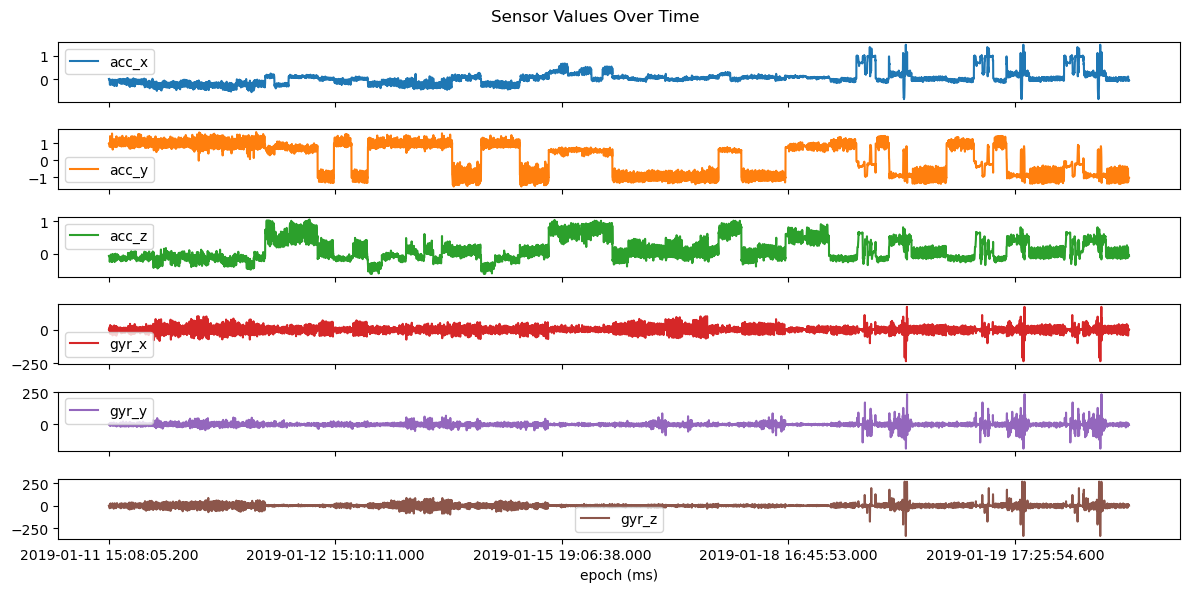

In [68]:
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

# Line Plots (Time Series)
df[sensor_cols].plot(figsize=(12, 6), subplots=True, title='Sensor Values Over Time')
plt.tight_layout()
plt.show()


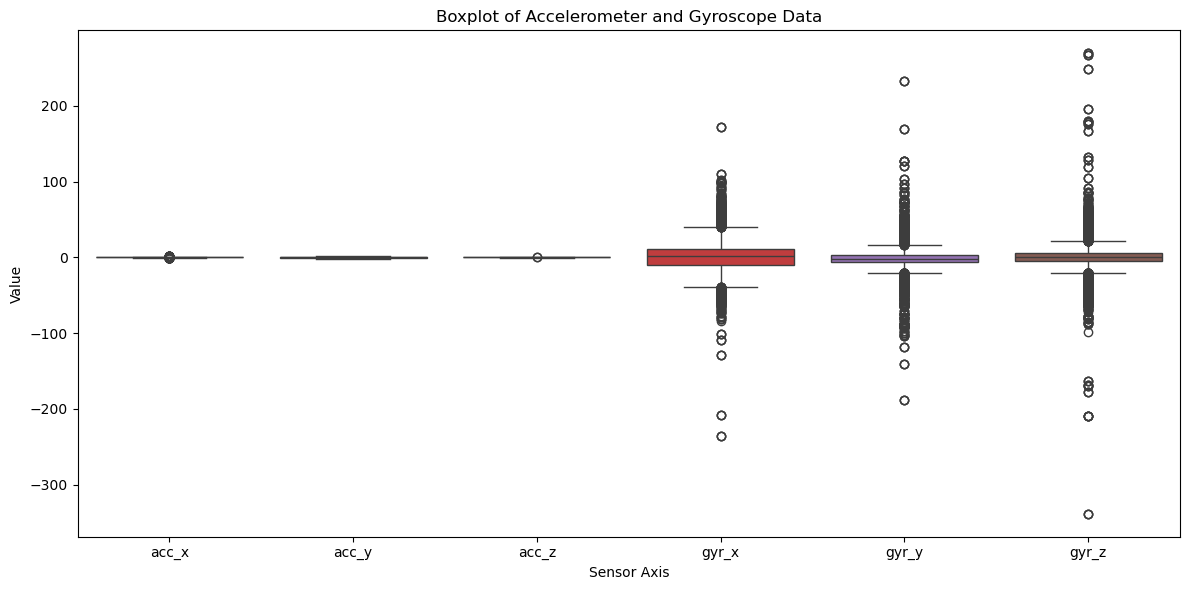

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Width=12, Height=6 (adjust as needed)
sns.boxplot(data=df[sensor_cols])
plt.title("Boxplot of Accelerometer and Gyroscope Data")
plt.xlabel("Sensor Axis")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


In [82]:
def mark_outliers_chauvenet(dataset, col, C=2):
    """Finds outliers in the specified column of datatable and adds a binary column with
    the same name extended with '_outlier' that expresses the result per data point.
    
    Taken from: https://github.com/mhoogen/ML4QS/blob/master/Python3Code/Chapter3/OutlierDetection.py

    Args:
        dataset (pd.DataFrame): The dataset
        col (string): The column you want apply outlier detection to
        C (int, optional): Degree of certainty for the identification of outliers given the assumption 
                           of a normal distribution, typicaly between 1 - 10. Defaults to 2.

    Returns:
        pd.DataFrame: The original dataframe with an extra boolean column 
        indicating whether the value is an outlier or not.
    """

    dataset = dataset.copy()
    # Compute the mean and standard deviation.
    mean = dataset[col].mean()
    std = dataset[col].std()
    N = len(dataset.index)
    criterion = 1.0 / (C * N)

    # Consider the deviation for the data points.
    deviation = abs(dataset[col] - mean) / std

    # Express the upper and lower bounds.
    low = -deviation / math.sqrt(C)
    high = deviation / math.sqrt(C)
    prob = []
    mask = []

    # Pass all rows in the dataset.
    for i in range(0, len(dataset.index)):
        # Determine the probability of observing the point
        prob.append(
            1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
        )
        # And mark as an outlier when the probability is below our criterion.
        mask.append(prob[i] < criterion)
    dataset[col + "_outlier"] = mask
    return dataset

In [90]:
#dealing with outliers
import numpy as np
import math
import scipy

outliers_removed_df = df.copy()
for col in sensor_cols:
    for label in df["label"].unique():
        dataset = mark_outliers_chauvenet(df[df["label"] == label], col)

        dataset.loc[dataset[col+"_outlier"],col] = np.nan

        outliers_removed_df.loc[(outliers_removed_df["label"] == label), col] = dataset[col]
        n_outliers = len(dataset) - len(dataset[col].dropna())
        print(f"Removed {n_outliers} from {col} for {label}")


C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Removed 0 from acc_x for bench
Removed 2 from acc_x for ohp
Removed 0 from acc_x for squat
Removed 2 from acc_x for dead


C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Removed 0 from acc_x for row
Removed 0 from acc_x for rest
Removed 5 from acc_y for bench
Removed 6 from acc_y for ohp
Removed 0 from acc_y for squat
Removed 0 from acc_y for dead
Removed 0 from acc_y for row
Removed 0 from acc_y for rest
Removed 3 from acc_z for bench


C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Removed 6 from acc_z for ohp
Removed 0 from acc_z for squat
Removed 1 from acc_z for dead
Removed 0 from acc_z for row
Removed 0 from acc_z for rest


C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Removed 2 from gyr_x for bench
Removed 4 from gyr_x for ohp
Removed 1 from gyr_x for squat
Removed 6 from gyr_x for dead
Removed 0 from gyr_x for row


C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Removed 12 from gyr_x for rest
Removed 14 from gyr_y for bench
Removed 15 from gyr_y for ohp


C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Removed 9 from gyr_y for squat
Removed 14 from gyr_y for dead
Removed 10 from gyr_y for row
Removed 9 from gyr_y for rest


C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Removed 13 from gyr_z for bench
Removed 1 from gyr_z for ohp
Removed 12 from gyr_z for squat
Removed 14 from gyr_z for dead
Removed 0 from gyr_z for row
Removed 24 from gyr_z for rest


C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i]))
C:\Users\prajualr\AppData\Local\Temp\ipykernel_1272\3743451488.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

In [92]:
outliers_removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9009 entries, 2019-01-11 15:08:05.200 to 2019-01-20 17:33:27.800
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9005 non-null   float64
 1   acc_y        8998 non-null   float64
 2   acc_z        8999 non-null   float64
 3   gyr_x        8984 non-null   float64
 4   gyr_y        8938 non-null   float64
 5   gyr_z        8945 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


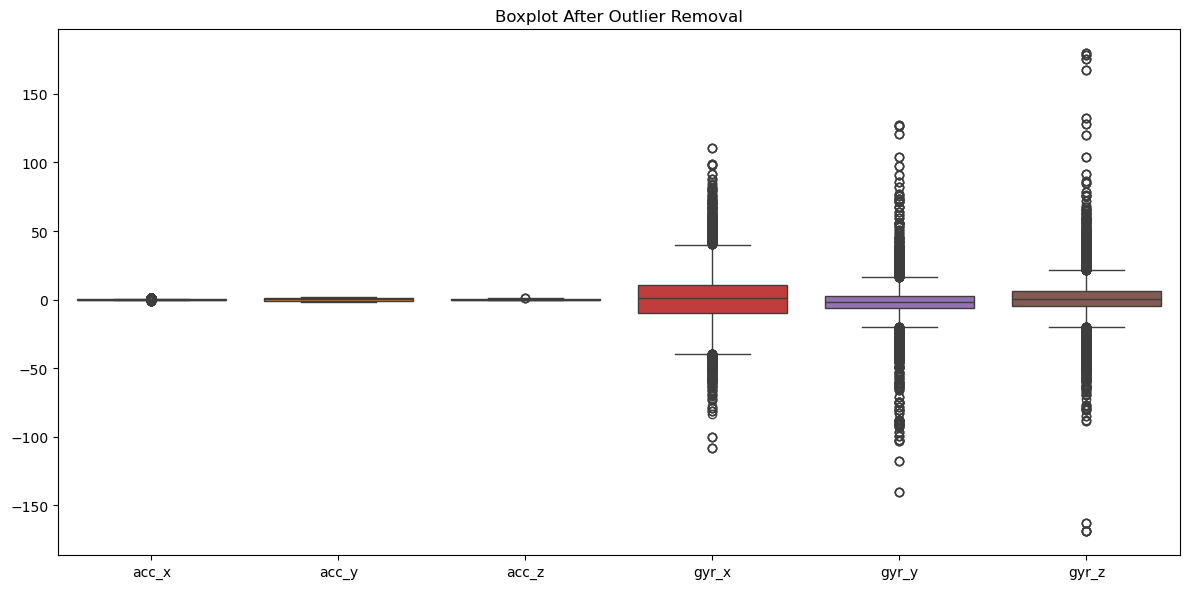

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=outliers_removed_df[sensor_cols])
plt.title("Boxplot After Outlier Removal")
plt.tight_layout()
plt.show()


In [96]:
# Check for missing values in the training data
print(outliers_removed_df.isnull().sum())

acc_x           4
acc_y          11
acc_z          10
gyr_x          25
gyr_y          71
gyr_z          64
participant     0
label           0
category        0
set             0
dtype: int64


In [98]:
# Save the DataFrame with outliers removed
outliers_removed_df.to_csv("D:/PycharmProjects/Strength_Training_Tracker_with Fastapi/data/processed/outliers_removed_df.csv")
outliers_removed_df.to_pickle("../../data/interim/02_outliers_removed_bychauvenets.pkl")
print("Outlier removal complete. Saved to 02_outliers_removed_bychauvenets.pkl.")

Outlier removal complete. Saved to 02_outliers_removed_bychauvenets.pkl.
